In [ ]:
"""
Code for replicating numerical experiment on comparing MMU with FPGM
"""

In [1]:
import numpy as np
import psdfactorization as pf
from matplotlib import pyplot as plt

In [2]:
def genDistanceMatrix(vec):
    # Generate a Distance Matrix from input vector vec
    # i,j entry is (vec[i]-vec[j])**2
    q = vec.shape[0]
    M = np.zeros((q,q))
    for i in range(q):
        for j in range(q):
            M[i,j] = (vec[i,]-vec[j,])**2
    return M

In [6]:
# Generate a random matrix

n = 20

r = 4
FactorA = []
FactorB = []
for i in range(n):
    G = np.random.randn(r,r)
    FactorA.append(G @ G.T)
    G = np.random.randn(r,r)
    FactorB.append(G @ G.T)

X = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        X[i,j] = np.trace(FactorA[i]@FactorB[j])
    

nIterates = 50
nTries = 5
q = r

Average Iteration Time: 0.0528125
Total Time: 2.640625
Average Iteration Time: 0.055625
Total Time: 2.78125
Average Iteration Time: 0.04875
Total Time: 2.4375
Average Iteration Time: 0.0471875
Total Time: 2.359375
Average Iteration Time: 0.0471875
Total Time: 2.359375


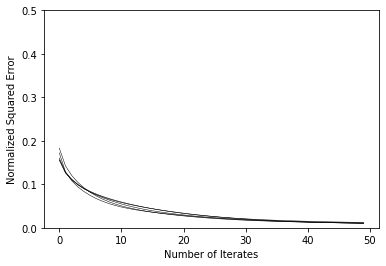

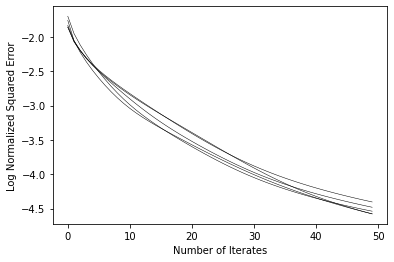

In [7]:
MMU_Errs = np.zeros((nTries,nIterates))

for jj in range(nTries):

    Soln = pf.compute_psd_factorization(X, q,nIterates=nIterates,silent=True)
    MMU_Errs[jj,:] = Soln['Errors']
    MMU_Errs[jj,:] = np.multiply(MMU_Errs[jj,:],MMU_Errs[jj,:])
    
# First plot
fig,ax = plt.subplots()

ax.set_ylim([0.0,0.5])
ax.set_xlabel('Number of Iterates')
ax.set_ylabel('Normalized Squared Error')

for ii in range(nTries):
    plt.plot((MMU_Errs[ii,:]),'k',linewidth=0.5)
    
plt.savefig('MMU_err.pdf')

# Second plot
fig,ax = plt.subplots()

ax.set_xlabel('Number of Iterates')
ax.set_ylabel('Log Normalized Squared Error')

for ii in range(nTries):
    plt.plot(np.log(MMU_Errs[ii,:]),'k',linewidth=0.5)
    
plt.savefig('MMU_logerr.pdf')

Average Iteration Time: 0.058125
Total Time: 2.90625
Average Iteration Time: 0.061875
Total Time: 3.09375
Average Iteration Time: 0.0628125
Total Time: 3.140625
Average Iteration Time: 0.0571875
Total Time: 2.859375
Average Iteration Time: 0.0565625
Total Time: 2.828125


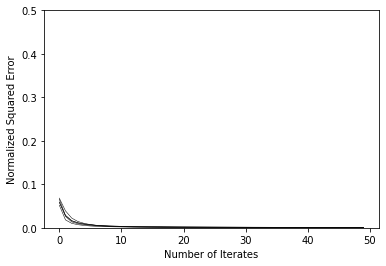

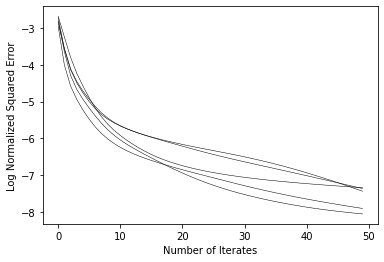

In [8]:
FPGM_Errs = np.zeros((nTries,nIterates))

for jj in range(nTries):

    Soln = pf.compute_psd_factorization(X, q,nIterates=nIterates,method='fpgm',silent=True)
    FPGM_Errs[jj,:] = Soln['Errors']
    FPGM_Errs[jj,:] = np.multiply(FPGM_Errs[jj,:],FPGM_Errs[jj,:])
    
# First plot
fig,ax = plt.subplots()

ax.set_ylim([0.0,0.5])
ax.set_xlabel('Number of Iterates')
ax.set_ylabel('Normalized Squared Error')

for ii in range(nTries):
    plt.plot((FPGM_Errs[ii,:]),'k',linewidth=0.5)
    
plt.savefig('FPGM_err.pdf')

# Second plot
fig,ax = plt.subplots()

ax.set_xlabel('Number of Iterates')
ax.set_ylabel('Log Normalized Squared Error')

for ii in range(nTries):
    plt.plot(np.log(FPGM_Errs[ii,:]),'k',linewidth=0.5)
    
plt.savefig('FPGM_logerr.pdf')

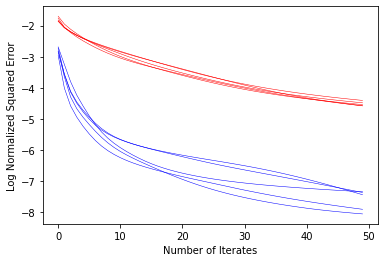

In [9]:
# Compare plots

fig,ax = plt.subplots()

ax.set_xlabel('Number of Iterates')
ax.set_ylabel('Log Normalized Squared Error')

for ii in range(nTries):
    plt.plot(np.log(MMU_Errs[ii,:]),'r',linewidth=0.5)
    plt.plot(np.log(FPGM_Errs[ii,:]),'b',linewidth=0.5)
    
plt.savefig('Compare_logerr.pdf')